In [1]:
# Importing required libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading the data
df_city = pd.read_csv("./air-quality-dataset/city_day.csv")

In [3]:
print(df_city.info())
df_city.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# Filling in Missing Data

<AxesSubplot: >

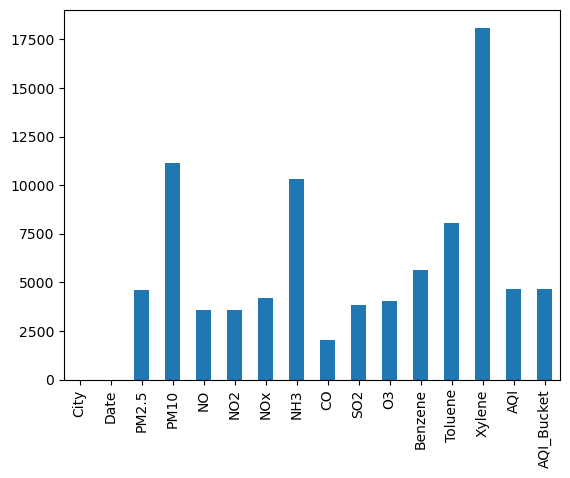

In [4]:
df_city.isnull().sum().plot(kind ='bar')

In [5]:
df_city['AQI'].fillna(method = 'ffill',inplace = True)
#df_city['AQI'].fillna(method = 'bfill',inplace = True)
#df_city['AQI'].fillna(value = 0,inplace = True)

# FBProphet for forecasting

In [6]:
from fbprophet import Prophet 

delhi_aqi = delhi[['Date','AQI']]
delhi_aqi.reset_index(inplace = True,drop = True)

#Defining our training dataset
train_df = delhi_aqi
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
train_df

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
#Defining the model and fitting on the training dataset
model = Prophet(holidays_prior_scale=0,seasonality_prior_scale=365,n_changepoints= 50,)
model.fit(train_df)

In [ ]:
#Extrapolating the dates into future 
future = model.make_future_dataframe(periods=365)
future.tail()

In [ ]:
#Forecasting the AQI values
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
#Calculating the cross  validation accuracy

from fbprophet.diagnostics import mape,cross_validation,performance_metrics
df_cv = cross_validation(model, initial='1100 days', period='121 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
print('Cross Validation accuracy:', (1 - df_p['mape'].mean())*100)

In [ ]:
#Plotting out the forecast
from fbprophet.plot import plot_plotly

fig = plot_plotly(model, forecast ,xlabel = 'Date',ylabel= 'AQI',figsize=(1000,750))
fig.show()

The model has learnt the seasonal trend of AQI.  

The model shows lower values of AQI for the year 2020. Probably considering the lower than normal AQI of the first few months of 2020 because of the quarantine. 